In [313]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [314]:
def gen_sequence(start=0, length =80, p=0.95):
    sequence = np.zeros(length)
    sequence[0] = start
    for i in range(1, length):
        random_num = np.random.rand()
        if random_num > p:
            # Switch state
            sequence[i] = 1-sequence[i-1]
        else:
            sequence[i] = sequence[i-1]
    return sequence

In [315]:
np.random.seed(0)
source_1_range = [100, 200]
source_2_range = [1000, 1300]

sequence_length = 48
num_sequences = 5000

seq1 = []
seq2 = []
combined = []

np.random.seed(0)
for seq in range(num_sequences):
    if seq % (num_sequences/10)==0:
        print(seq)
    source_1_power_val = np.random.choice(list(range(*source_1_range)))
    source_2_power_val = np.random.choice(list(range(*source_2_range)))
    
    source_1_seq = source_1_power_val*gen_sequence(start=np.random.choice([0, 1]), length =sequence_length, p=0.95)
    source_2_seq = source_2_power_val*gen_sequence(start=np.random.choice([0, 1]), length =sequence_length, p=0.95)
    combined_seq = source_1_seq + source_2_seq
    seq1.append(source_1_seq)
    seq2.append(source_2_seq)
    combined.append(combined_seq)

combined = np.array(combined)
seq1 = np.array(seq1)
seq2 = np.array(seq2)

#seq1 = seq1.reshape(num_sequences, sequence_length, 1)
#seq2 = seq2.reshape(num_sequences, sequence_length, 1)
combined = combined.reshape(num_sequences, sequence_length, 1)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


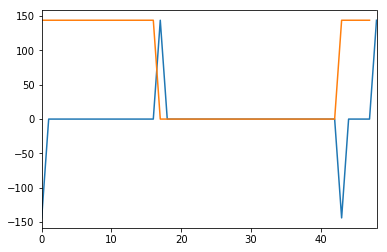

In [316]:
pd.Series(np.convolve(seq1[0], [-1, 1])).plot()
pd.Series(seq1[0]).plot()

In [103]:
seq1 = seq1.reshape(num_sequences, sequence_length, 1)

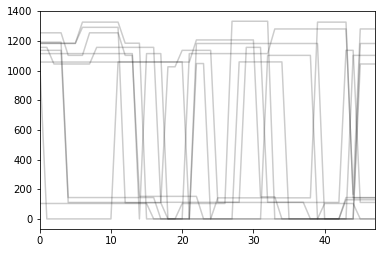

In [98]:
pd.DataFrame(combined).head(10).T.plot(legend=False, color='k',alpha=0.2)

In [252]:
from keras.layers import Conv1D, Dense, Flatten, MaxPool1D, InputLayer, Activation, Dropout, MaxPooling1D
from keras.models import Sequential


In [408]:
model = Sequential()
filters=20
kernel_size=10
model.add(InputLayer(input_shape=(sequence_length,1)))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu',
                 strides=1 ,name='C1'))
model.add(MaxPooling1D(pool_size=2))


model.add(Dropout(rate=0.1))
model.add(Conv1D(filters=25,
                 kernel_size=5,
                 padding='same',
                 activation='relu',
                 strides=1 ))
model.add(MaxPooling1D(pool_size=2))



model.add(Dropout(rate=0.1))

model.add(Conv1D(filters=30,
                 kernel_size=3,
                 padding='same',
                 activation='relu',
                 strides=1 ))
model.add(MaxPooling1D(pool_size=2))


model.add(Dropout(rate=0.1))

model.add(Conv1D(filters=35,
                 kernel_size=2,
                 padding='same',
                 activation='relu',
                 strides=1 ))
model.add(MaxPooling1D(pool_size=2))



model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(sequence_length, activation='relu'))
model.add(Dropout(rate=0.1))


model.summary()
model.compile('adam','mean_absolute_error')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        (None, 48, 1)             0         
_________________________________________________________________
C1 (Conv1D)                  (None, 48, 20)            220       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 24, 20)            0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 24, 20)            0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 24, 25)            2525      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 12, 25)            0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 12, 25)            0         
__________

In [253]:
model = Sequential()
filters=1
kernel_size=2
model.add(InputLayer(input_shape=(sequence_length,1)))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu',
                 strides=2 ,name='C1'))

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(sequence_length, activation='relu'))
#model.add(Dropout(rate=0.1))


model.summary()
model.compile('adam','mean_absolute_error')



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        (None, 48, 1)             0         
_________________________________________________________________
C1 (Conv1D)                  (None, 24, 1)             3         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 1)             0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 48)                624       
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [409]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

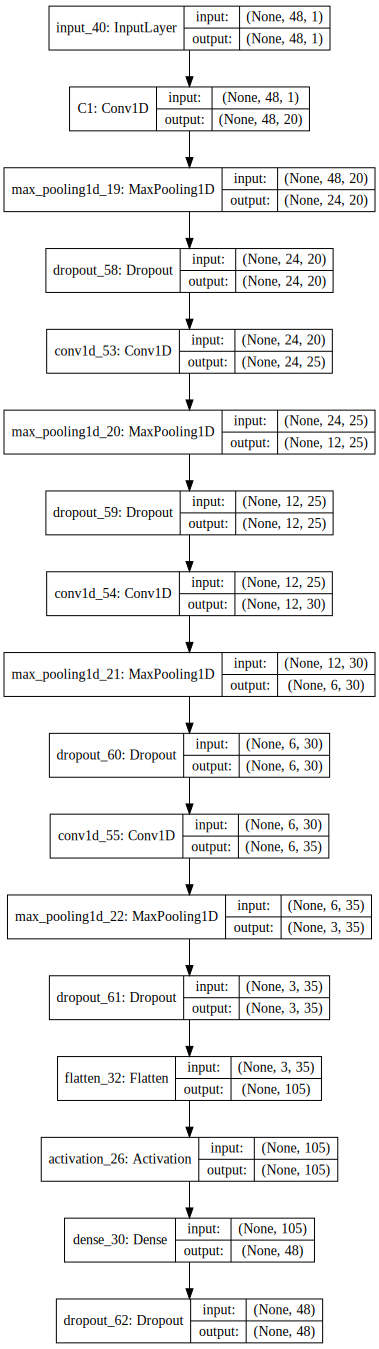

In [410]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [411]:
model.fit(combined[:4000], seq1[:4000], epochs=1500, validation_split=0.1)

Train on 3600 samples, validate on 400 samples
Epoch 1/1500
3600/3600 [==============================] - 2s 536us/step - loss: 74.8175 - val_loss: 72.4977
Epoch 2/1500
3600/3600 [==============================] - 1s 163us/step - loss: 71.8617 - val_loss: 64.8445
Epoch 3/1500
3600/3600 [==============================] - 1s 160us/step - loss: 63.3824 - val_loss: 57.8250
Epoch 4/1500
3600/3600 [==============================] - 1s 162us/step - loss: 58.7185 - val_loss: 55.6624
Epoch 5/1500
3600/3600 [==============================] - 1s 165us/step - loss: 57.2508 - val_loss: 54.3763
Epoch 6/1500
3600/3600 [==============================] - 1s 165us/step - loss: 55.4706 - val_loss: 54.3087
Epoch 7/1500
3600/3600 [==============================] - 1s 164us/step - loss: 54.6669 - val_loss: 52.9669
Epoch 8/1500
3600/3600 [==============================] - 1s 165us/step - loss: 53.9649 - val_loss: 52.6573
Epoch 9/1500
3600/3600 [==============================] - 1s 164us/step - loss: 53.1902 -

Epoch 76/1500
3600/3600 [==============================] - 1s 158us/step - loss: 31.5861 - val_loss: 32.6164
Epoch 77/1500
3600/3600 [==============================] - 1s 193us/step - loss: 31.4941 - val_loss: 32.6513
Epoch 78/1500
3600/3600 [==============================] - 1s 174us/step - loss: 31.4622 - val_loss: 30.0735
Epoch 79/1500
3600/3600 [==============================] - 1s 160us/step - loss: 31.3837 - val_loss: 32.1874
Epoch 80/1500
3600/3600 [==============================] - 1s 164us/step - loss: 30.9593 - val_loss: 32.4597
Epoch 81/1500
3600/3600 [==============================] - 1s 184us/step - loss: 30.7956 - val_loss: 29.9860
Epoch 82/1500
3600/3600 [==============================] - 1s 170us/step - loss: 31.2304 - val_loss: 31.3158
Epoch 83/1500
3600/3600 [==============================] - 1s 161us/step - loss: 30.9370 - val_loss: 29.9918
Epoch 84/1500
3600/3600 [==============================] - 1s 166us/step - loss: 30.8777 - val_loss: 31.8305
Epoch 85/1500
3600/

3600/3600 [==============================] - 1s 160us/step - loss: 26.3488 - val_loss: 29.1540
Epoch 225/1500
3600/3600 [==============================] - 1s 163us/step - loss: 26.3046 - val_loss: 27.6955
Epoch 226/1500
3600/3600 [==============================] - 1s 163us/step - loss: 26.0957 - val_loss: 26.9377
Epoch 227/1500
3600/3600 [==============================] - 1s 158us/step - loss: 26.1175 - val_loss: 28.8560
Epoch 228/1500
3600/3600 [==============================] - 1s 162us/step - loss: 26.0777 - val_loss: 27.2421
Epoch 229/1500
3600/3600 [==============================] - 1s 203us/step - loss: 26.6076 - val_loss: 26.0542
Epoch 230/1500
3600/3600 [==============================] - 1s 170us/step - loss: 26.0904 - val_loss: 27.3235
Epoch 231/1500
3600/3600 [==============================] - 1s 180us/step - loss: 26.5599 - val_loss: 25.5348
Epoch 232/1500
3600/3600 [==============================] - 1s 170us/step - loss: 26.3111 - val_loss: 25.5650
Epoch 233/1500
3600/3600 

3600/3600 [==============================] - 1s 208us/step - loss: 25.5705 - val_loss: 25.1294
Epoch 373/1500
3600/3600 [==============================] - 1s 180us/step - loss: 25.2000 - val_loss: 26.8929
Epoch 374/1500
3600/3600 [==============================] - 1s 272us/step - loss: 25.1186 - val_loss: 25.5760
Epoch 375/1500
3600/3600 [==============================] - 1s 165us/step - loss: 25.5659 - val_loss: 25.3118
Epoch 376/1500
3600/3600 [==============================] - 1s 188us/step - loss: 26.0961 - val_loss: 27.3337
Epoch 377/1500
3600/3600 [==============================] - 1s 177us/step - loss: 25.6672 - val_loss: 27.3259
Epoch 378/1500
3600/3600 [==============================] - 1s 211us/step - loss: 24.6995 - val_loss: 25.0100
Epoch 379/1500
3600/3600 [==============================] - 1s 242us/step - loss: 25.2165 - val_loss: 24.0702
Epoch 380/1500
3600/3600 [==============================] - 1s 177us/step - loss: 24.9724 - val_loss: 25.9763
Epoch 381/1500
3600/3600 

3600/3600 [==============================] - 1s 168us/step - loss: 24.6455 - val_loss: 24.0518
Epoch 521/1500
3600/3600 [==============================] - 1s 168us/step - loss: 24.4594 - val_loss: 25.7915
Epoch 522/1500
3600/3600 [==============================] - 1s 168us/step - loss: 25.0188 - val_loss: 24.1061
Epoch 523/1500
3600/3600 [==============================] - 1s 162us/step - loss: 24.4254 - val_loss: 24.0266
Epoch 524/1500
3600/3600 [==============================] - 1s 160us/step - loss: 24.8610 - val_loss: 25.0825
Epoch 525/1500
3600/3600 [==============================] - 1s 162us/step - loss: 24.6008 - val_loss: 24.8741
Epoch 526/1500
3600/3600 [==============================] - 1s 173us/step - loss: 24.5391 - val_loss: 24.8732
Epoch 527/1500
3600/3600 [==============================] - 1s 169us/step - loss: 24.4020 - val_loss: 24.8397
Epoch 528/1500
3600/3600 [==============================] - 1s 171us/step - loss: 24.9088 - val_loss: 26.2731
Epoch 529/1500
3600/3600 

KeyboardInterrupt: 

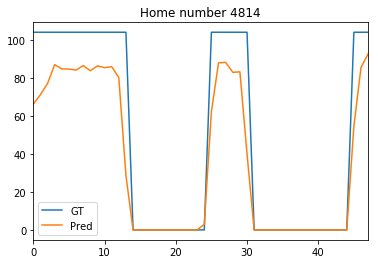

In [417]:
start =4814
ax = pd.DataFrame(seq1[start:start+1]).squeeze().plot(label='GT')
pd.DataFrame(model.predict(combined[start:start+1])).squeeze().plot(ax=ax,label='Pred')

plt.legend()
plt.title("Home number {}".format(start))
plt.savefig("/Users/nipun/Desktop/{}.png".format(start))

In [399]:
pd.DataFrame(seq2[start:start+1]).squeeze()

0        0.0
1        0.0
2     1058.0
3     1058.0
4     1058.0
5     1058.0
6     1058.0
7     1058.0
8     1058.0
9     1058.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
Name: 0, dtype: float64